# Data lab 4 - Portfolio Performance Attribution and Factor Model
## SHAO JIAHENG
#### Note 1: Review what you have learned in Data labs, DataCamp assignments, and in-class sample code.
#### Note 2: Chapter "Performance Attribution" of DataCamp course "Introduction to Portfolio Analysis in Python"  is a useful reference.
#### Note 3: This note serves as a guide. You are free to tinker with it! 

### 1. Revisit the all-weather portfolio you crafted. Create the maximum Sharpe portfolio's daily return dataframe and then merge it with Fama French's five return factors.

#### If you have attempted the optional bonus, why not include the portfolios with L2 regularization and Black-Litterman model too.

In [118]:
# Import the necessary packages
import yfinance as yf
import datetime as dt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
# Pick a list of stocks that form your all-weather portfolio
symbols_list = ["AAPL", "PG", "NEE", "UNH", "UNP", "INFY", "COST", "MDT", "AMT", "V"]
# Draw data for the past five years
start = dt.datetime(2017,9,1)
end = dt.datetime(2022,9,1)
data = yf.download(symbols_list, start=start, end=end)
#Illustrative, change into yours!
data.head(5)




[*********************100%***********************]  10 of 10 completed


Adj Close                                                          \
                 AAPL         AMT        COST      INFY        MDT        NEE   
Date                                                                            
2017-08-31  38.911674  133.133499  146.150055  6.548217  71.802483  33.610607   
2017-09-01  38.923546  131.083237  147.548737  6.478370  71.294823  33.532455   
2017-09-05  38.456123  132.135345  148.387924  6.395426  71.089989  33.554783   
2017-09-06  38.415794  131.353012  148.126877  6.382329  71.134514  33.105930   
2017-09-07  38.261559  132.180313  148.518494  6.364868  71.205757  33.382828   

                                                          ...     Volume  \
                   PG         UNH        UNP           V  ...       AAPL   
Date                                                      ...              
2017-08-31  80.494637  184.112137  94.792656  100.222595  ...  107140400   
2017-09-01  80.721451  184.898956  94.945694  100.590500  ...   66364400   
2017-09-05  80.887245  184.491653  93.712410   99.728844  ...  117874000   
2017-09-06  80.887245  183.630798  94.531609   99.893417  ...   86606800   
2017-09-07  81.105301  184.132538  94.963692  101.229469  ...   87714000   

                                                                            \
                AMT     COST      INFY      MDT      NEE       PG      UNH   
Date                                                                         
2017-08-31  2293200  4567700  17592000  5661900  6826000  5864400  2990200   
2017-09-01  1765800  2833500  10663800  3133400  4287200  4960700  2241800   
2017-09-05  1559300  3413000  12538600  3255800  4299200  6532100  2700800   
2017-09-06  1380700  2873700  12556600  3784000  9138400  6747200  3040200   
2017-09-07  1757400  2479300   8000400  3387000  7742400  7735400  2684600   

                               
                UNP         V  
Date                           
2017-08-31  2744400  13766000  
2017-09-01  2347700   4466800  
2017-09-05  2598700   6337500  
2017-09-06  4378700   6372200  
2017-09-07  3622900   6508600  

[5 rows x 60 columns]

In [120]:
# Keep only the adjusted close in the dataframe
# Note that the date is in the index
price = data["Adj Close"]

In [121]:
# Calculate return using method pct_change
# Find out more about .pct_change with help! 
daily_return = price.pct_change()
daily_return.head(5)

,AAPL,AMT,COST,INFY,MDT,NEE,PG,UNH,UNP,V
Date,,,,,,,,,,
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,0.000305,-0.015400,0.009570,-0.010667,-0.007070,-0.002325,0.002818,0.004274,0.001614,0.003671
2017-09-05,-0.012009,0.008026,0.005688,-0.012803,-0.002873,0.000666,0.002054,-0.002203,-0.012989,-0.008566
2017-09-06,-0.001049,-0.005921,-0.001759,-0.002048,0.000626,-0.013377,0.000000,-0.004666,0.008742,0.001650
2017-09-07,-0.004015,0.006298,0.002644,-0.002736,0.001002,0.008364,0.002696,0.002732,0.004571,0.013375


In [122]:
# function that takes portfolio weights and creates a time-series of daily portfolio returns
def portfolio_return_series(daily_returns, weights):
    
    ''' 
    INPUTS
    daily returns: dataframe of daily returns. Each ticker column contains the series of daily returns for the ticker
    weights: numpy array of the portfolio weight on each ticker (sorted in ascending order)
    
    OUTPUTS
    portfolio_daily_returns: the portfolio return series given the weights
    
    '''    
    
    # Create portfolio daily returns
    portfolio_daily_returns = daily_returns.dot(weights)
    return portfolio_daily_returns

In [123]:
## Install PyPortfolioOpt package
# !pip install PyPortfolioOpt

# Import the packages 
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

The Maximum Sharpe Portfolio

In [124]:
# Calculate expected returns mu 
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(price)

# Calculate the covariance matrix S
cov_matrix_d = daily_return.cov()

# Obtain the efficient frontier
ef = EfficientFrontier(mu, cov_matrix_d)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weight_maxsharpe = ef.max_sharpe()
clean_weight_maxsharpe = ef.clean_weights()
# Inspect the calculated weights
print("Raw weight: ", raw_weight_maxsharpe)
print("Cleaned weight: ", clean_weight_maxsharpe)


Raw weight:  OrderedDict([('AAPL', 0.173914163334802), ('AMT', 0.0), ('COST', 0.5956976498073819), ('INFY', 0.1138865467365759), ('MDT', 0.0), ('NEE', 0.0974203489570589), ('PG', 0.0), ('UNH', 0.0190812911641812), ('UNP', 0.0), ('V', 0.0)])
Cleaned weight:  OrderedDict([('AAPL', 0.17391), ('AMT', 0.0), ('COST', 0.5957), ('INFY', 0.11389), ('MDT', 0.0), ('NEE', 0.09742), ('PG', 0.0), ('UNH', 0.01908), ('UNP', 0.0), ('V', 0.0)])


The minimum volatility portfolio

In [125]:
# Obtain the efficient frontier
mu = expected_returns.mean_historical_return(price)
sigma = risk_models.sample_cov(price)
ef = EfficientFrontier(mu, sigma)
# Calculate weights for the minimum volatility portfolio
raw_weight_minvol = ef.min_volatility()
clean_weight_minvol = ef.clean_weights()
print("Raw weight: ", raw_weight_minvol)
print("Cleaned weight: ", clean_weight_minvol)

Raw weight:  OrderedDict([('AAPL', 0.0), ('AMT', 0.0095740492729127), ('COST', 0.2400402912562032), ('INFY', 0.1156778914164396), ('MDT', 0.160972744919265), ('NEE', 0.073952330642127), ('PG', 0.3411633411581421), ('UNH', 0.0), ('UNP', 0.0586193513349102), ('V', 0.0)])
Cleaned weight:  OrderedDict([('AAPL', 0.0), ('AMT', 0.00957), ('COST', 0.24004), ('INFY', 0.11568), ('MDT', 0.16097), ('NEE', 0.07395), ('PG', 0.34116), ('UNH', 0.0), ('UNP', 0.05862), ('V', 0.0)])


In [126]:
# 1. Daily portfolio returns for the equally-weighted portfolio
equal_weight = np.repeat(0.1, 10)
equal_weight_return = portfolio_return_series(daily_return, equal_weight)
# Extract the first element from the function output for daily returns
equal_weight_first_element = equal_weight_return.iloc[1]

# 2. Daily portfolio returns for the maximum Sharpe portfolio
# Extract the first element from the function output for daily returns
clean_weight_maxsharpe_list = list(clean_weight_maxsharpe.values())
clean_weight_maxsharpe_array = np.array(clean_weight_maxsharpe_list)
max_sharpe_daily_return = portfolio_return_series(daily_return, clean_weight_maxsharpe_array)
max_sharpe_first_element = max_sharpe_daily_return.iloc[1]

# 3. Daily portfolio returns for the minimum volatility portfolio
# Extract the first element from the function output for daily returns
clean_weight_minvol_list = list(clean_weight_minvol.values())
clean_weight_minvol_array = np.array(clean_weight_minvol_list)
minvol_daily_return = portfolio_return_series(daily_return, clean_weight_minvol_array)
minvol_first_element = minvol_daily_return.iloc[1]



# Merge the three series side-by-side into a dataframe
# Note the index is date
portfolio_returns = pd.concat([equal_weight_return, max_sharpe_daily_return, minvol_daily_return], axis = 1)
# Rename column names
portfolio_returns = portfolio_returns.rename(columns = {0: 'portfolio_ew', 1: 'portfolio_maxsharpe', 2: 'portfolio_minvol'})
print(portfolio_returns)


            portfolio_ew  portfolio_maxsharpe  portfolio_minvol
Date                                                           
2017-08-31           NaN                  NaN               NaN
2017-09-01     -0.001321             0.004394          0.000662
2017-09-05     -0.003501            -0.000136         -0.000513
2017-09-06     -0.001780            -0.002856         -0.001092
2017-09-07      0.003493             0.001432          0.002346
...                  ...                  ...               ...
2022-08-25      0.010632             0.011389          0.008686
2022-08-26     -0.028264            -0.032142         -0.027499
2022-08-29     -0.004806            -0.005425         -0.004553
2022-08-30     -0.013817            -0.011904         -0.012361
2022-08-31     -0.005800            -0.005827         -0.006683

[1259 rows x 3 columns]


In [127]:
# Inspect the last five observations of the portfolio_returns dataframe
portfolio_returns.tail(5)

,portfolio_ew,portfolio_maxsharpe,portfolio_minvol
Date,,,
2022-08-25,0.010632,0.011389,0.008686
2022-08-26,-0.028264,-0.032142,-0.027499
2022-08-29,-0.004806,-0.005425,-0.004553
2022-08-30,-0.013817,-0.011904,-0.012361
2022-08-31,-0.005800,-0.005827,-0.006683


In [128]:
# Read the csv file with factor returns with pd.read_csv()
# Note: place the file where your Jupyter notebook is
factor_returns = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily.csv")

# Divide all factor returns by 100
# Consistent with how we calculate portfolio returns
factor_returns.iloc[:, 1:] = (factor_returns.iloc[:, 1:]).div(100)

print(factor_returns)


           Date  Mkt-RF     SMB     HML     RMW     CMA       RF
0      19630701 -0.0067  0.0002 -0.0035  0.0003  0.0013  0.00012
1      19630702  0.0079 -0.0028  0.0028 -0.0008 -0.0021  0.00012
2      19630703  0.0063 -0.0018 -0.0010  0.0013 -0.0025  0.00012
3      19630705  0.0040  0.0009 -0.0028  0.0007 -0.0030  0.00012
4      19630708 -0.0063  0.0007 -0.0020 -0.0027  0.0006  0.00012
...         ...     ...     ...     ...     ...     ...      ...
14890  20220825  0.0145  0.0014 -0.0001  0.0012 -0.0041  0.00008
14891  20220826 -0.0338 -0.0028  0.0169  0.0024  0.0087  0.00008
14892  20220829 -0.0072 -0.0038  0.0042  0.0023  0.0042  0.00008
14893  20220830 -0.0111 -0.0038 -0.0024 -0.0024  0.0012  0.00008
14894  20220831 -0.0074  0.0022 -0.0044 -0.0063 -0.0012  0.00008

[14895 rows x 7 columns]


This file is from http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Research and is created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202208 CRSP database. The 1-month TBill return is from Ibbotson and Associates. For more details on the factor returns, please read http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

In [129]:
# Inspect the dataframe with info()
factor_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    14895 non-null  int64  
 1   Mkt-RF  14895 non-null  float64
 2   SMB     14895 non-null  float64
 3   HML     14895 non-null  float64
 4   RMW     14895 non-null  float64
 5   CMA     14895 non-null  float64
 6   RF      14895 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 814.7 KB


In [130]:
# Inspect the last five observations

factor_returns.tail(5)
factor_returns['Date'] = pd.to_datetime(factor_returns['Date'].astype(str), format = "%Y-%m-%d")
factor_returns = factor_returns.set_index('Date')

factor_returns.index = factor_returns.index.date
portfolio_returns.index = pd.to_datetime(portfolio_returns.index, format = "%Y-%m-%d")
portfolio_returns.index = portfolio_returns.index.date


In [131]:
# Merge portfolio daily returns with factor returns
port_factor_return = pd.concat([portfolio_returns, factor_returns[dt.date(2017,8,31):]], axis = 1)

In [132]:
# Inspect the last five observations
port_factor_return.tail(5)

,portfolio_ew,portfolio_maxsharpe,portfolio_minvol,Mkt-RF,SMB,HML,RMW,CMA,RF
2022-08-25,0.010632,0.011389,0.008686,0.0145,0.0014,-0.0001,0.0012,-0.0041,0.00008
2022-08-26,-0.028264,-0.032142,-0.027499,-0.0338,-0.0028,0.0169,0.0024,0.0087,0.00008
2022-08-29,-0.004806,-0.005425,-0.004553,-0.0072,-0.0038,0.0042,0.0023,0.0042,0.00008
2022-08-30,-0.013817,-0.011904,-0.012361,-0.0111,-0.0038,-0.0024,-0.0024,0.0012,0.00008
2022-08-31,-0.005800,-0.005827,-0.006683,-0.0074,0.0022,-0.0044,-0.0063,-0.0012,0.00008


In [133]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
portfolio_return = ['portfolio_ew', 'portfolio_maxsharpe', 'portfolio_minvol']

# Print correlation table. Hint use .corr()
port_factor_return.corr()

,portfolio_ew,portfolio_maxsharpe,portfolio_minvol,Mkt-RF,SMB,HML,RMW,CMA,RF
portfolio_ew,1.000000,0.854123,0.936758,0.913960,0.001464,-0.030055,0.023702,-0.185517,-0.015121
portfolio_maxsharpe,0.854123,1.000000,0.868340,0.805126,-0.075042,-0.211226,0.005964,-0.239465,-0.020674
portfolio_minvol,0.936758,0.868340,1.000000,0.820802,-0.050095,-0.020380,0.083346,-0.122856,-0.009502
Mkt-RF,0.913960,0.805126,0.820802,1.000000,0.170599,-0.037520,-0.122989,-0.280367,-0.030524
SMB,0.001464,-0.075042,-0.050095,0.170599,1.000000,0.308769,-0.188263,0.033053,-0.042974
HML,-0.030055,-0.211226,-0.020380,-0.037520,0.308769,1.000000,0.409304,0.619241,-0.049847
RMW,0.023702,0.005964,0.083346,-0.122989,-0.188263,0.409304,1.000000,0.332965,-0.042774
CMA,-0.185517,-0.239465,-0.122856,-0.280367,0.033053,0.619241,0.332965,1.000000,-0.044610
RF,-0.015121,-0.020674,-0.009502,-0.030524,-0.042974,-0.049847,-0.042774,-0.044610,1.000000


### 2. Examine visually the correlation between portfolio and factor returns

#### Hint: Write functions for repetitive lines of codes 

In [134]:
# function that takes portfolio and factor returns and creates 20-day rolling correlation with a return factor
def portfolio_factor_correlation(portfolio_type, df):
    
    ''' 
    INPUTS
    portfolio type: portfolio_ew, portfolio_maxsharpe, portfolio_minvol
    df: dataframe containing portfolio and factor returns
    
    OUTPUTS
    plot the 20-day rolling correlation between a portfolio and a factor return
    
    '''    
    plt.figure(figsize=(40,10)) 
    for factor in factors:
        column_name = factor + "_corr"
        # Calculate 20-day rolling correlation with the market
        df[column_name] = df[portfolio_type].rolling(20).corr(df[factor])

        # Plot the correlation between a portfolio and factor returns
        df[column_name].plot()
        plt.legend(bbox_to_anchor =(0.65, -0.05))

    return

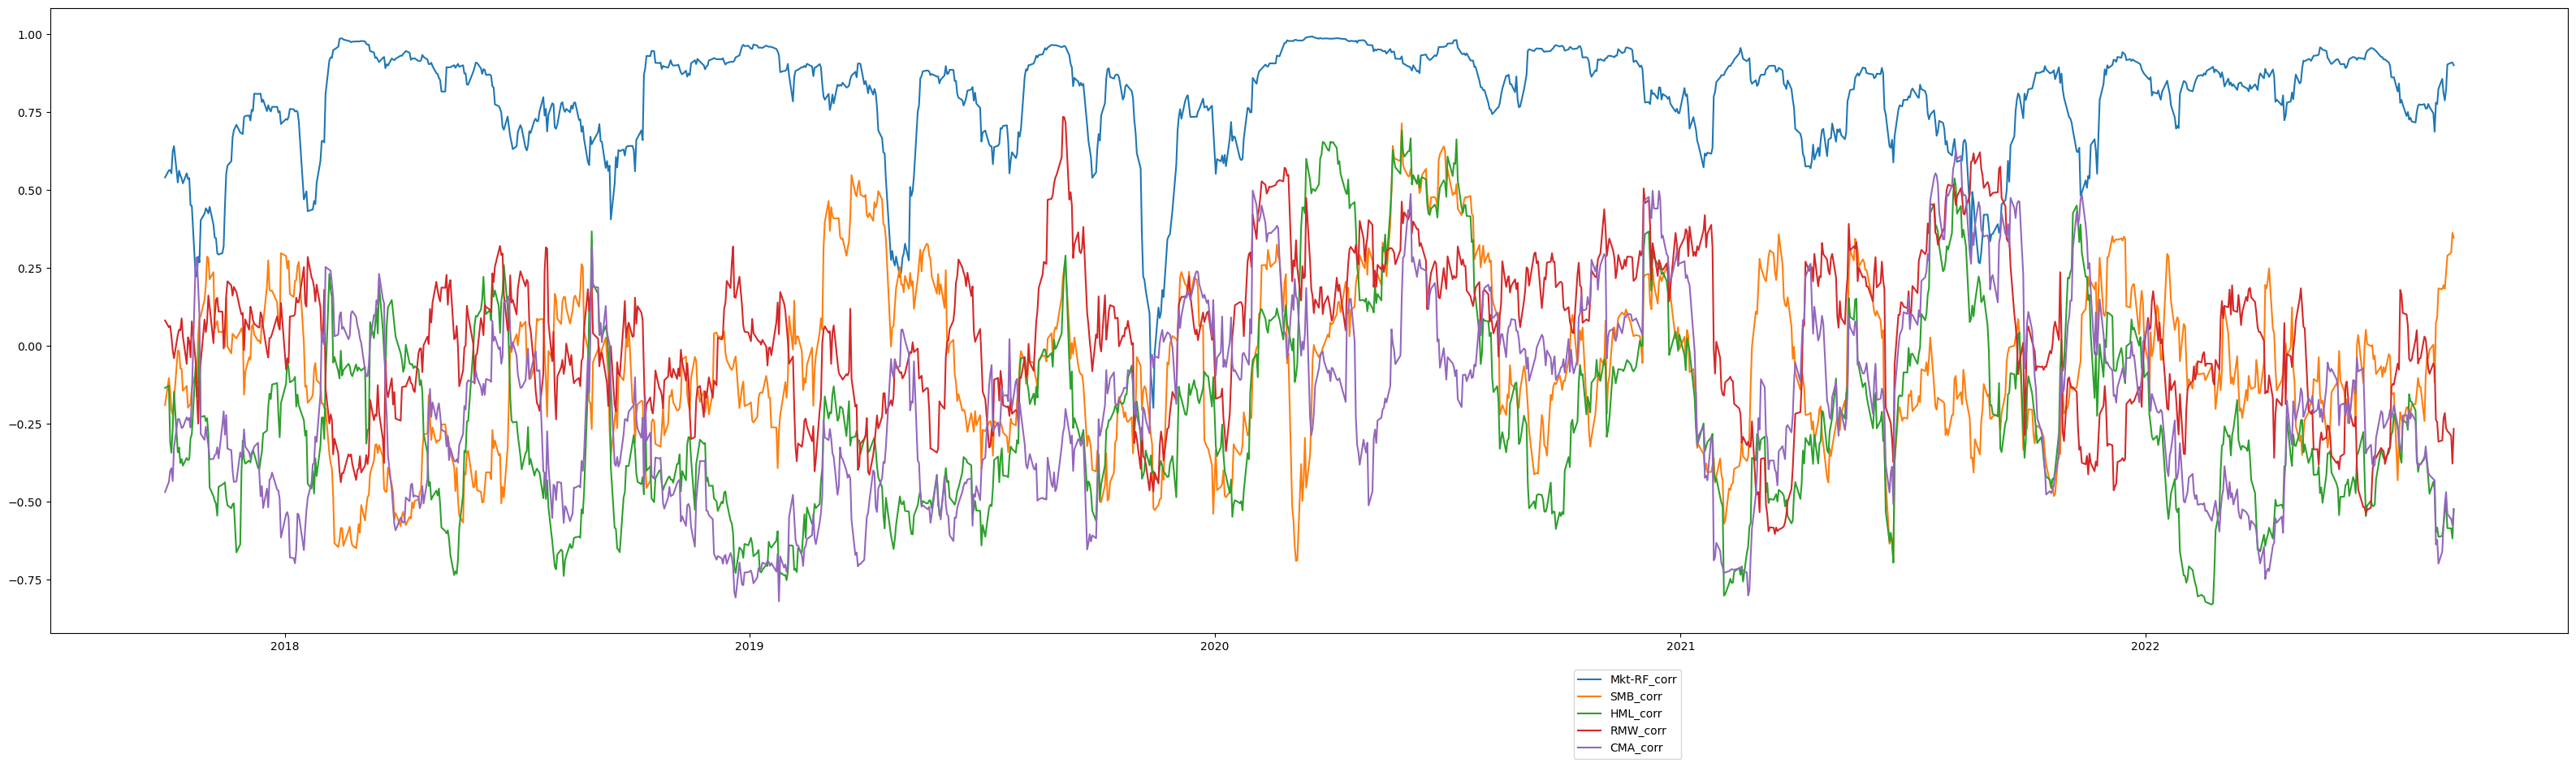

In [135]:
# Call the function portfolio_factor_correlation for the equally weighted portfolio
portfolio_factor_correlation(portfolio_return[0], port_factor_return)

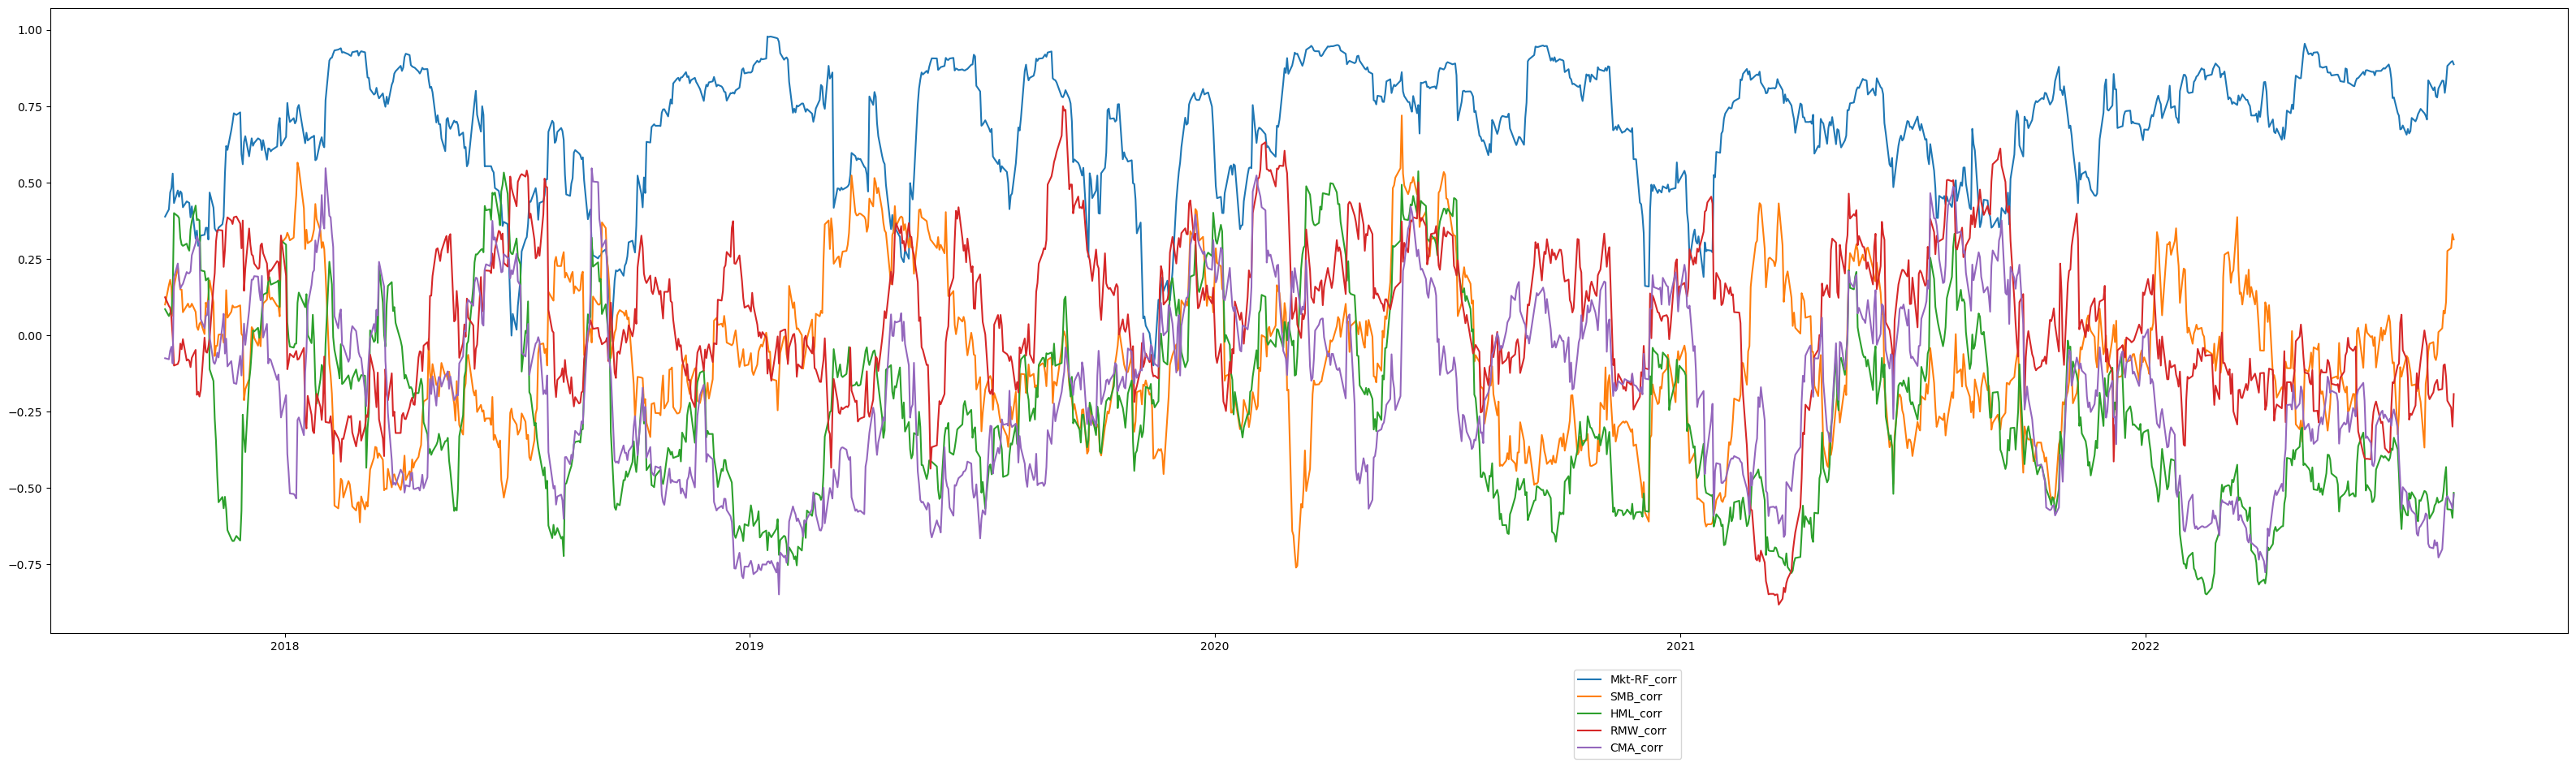

In [136]:
# Call the function portfolio_factor_correlation for the maximum Sharpe portfolio
portfolio_factor_correlation(portfolio_return[1], port_factor_return)

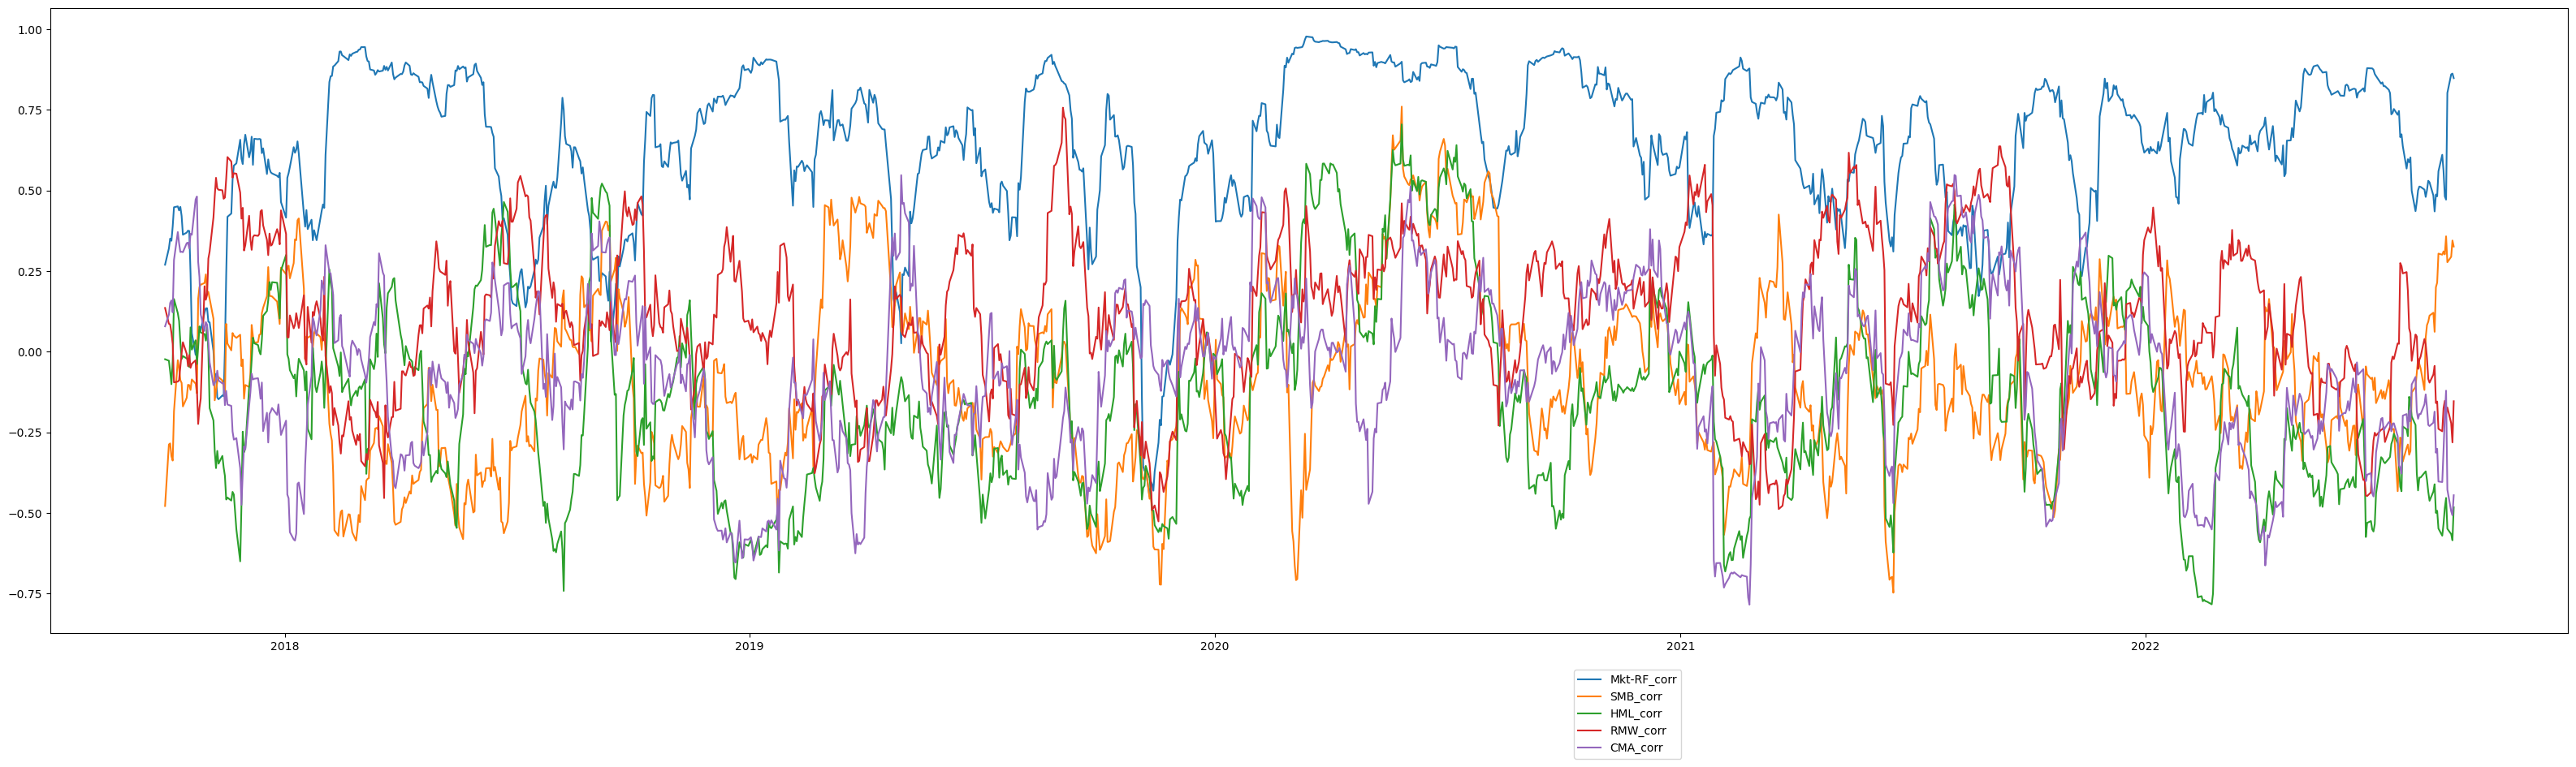

In [137]:
# Call the function portfolio_factor_correlation for the minimum volatility portfolio
portfolio_factor_correlation(portfolio_return[2], port_factor_return)

### 3. Regress the portfolio return on each factor and assess the portfolio's sensitivity to each factor.

#### For the curious, optional challenge, how do you test whether the intercept (i.e., alpha) is significantly different from the risk-free rate for a single-factor regression?
#### Hint: Write functions for repetitive lines of codes

In [138]:
port_factor_return = port_factor_return.iloc[1:]

In [139]:
# Import the ols function
import statsmodels.api as sm
import scipy.stats
# function that takes portfolio and factor returns and run a regression of portfolio return on a factor return
# it reports the portfolio sensitivity to a return factor
def portfolio_factor_sensitivity(portfolio_type, df):
    
    ''' 
    INPUTS
    portfolio type: portfolio_ew, portfolio_maxsharpe, portfolio_minvol
    df: dataframe containing portfolio and factor returns
    
    OUTPUTS
    regression result of a portfolio on a return factor
    
    '''    
    for factor in factors:
        
        # Create the regression model object
        model = sm.OLS(df[factor], df[portfolio_type]).fit()
        # Fit the model
        prediction = model.predict(df[factor])
        # Print the parameters of the fitted model
        b1 = model.params
        print("Parameters of the fitted model: \nb1: %f" % (b1))
        # Optional challenge: testing the hypothesis that the intercept is significantly different from the risk-free rate
        # Hint: F-test
        f = np.var(df[portfolio_type], ddof=1)/np.var(df['RF'], ddof=1)
        nun = df[portfolio_type].size-1
        dun = df['RF'].size-1
        p_value = 1-scipy.stats.f.cdf(f, nun, dun)
        #print("p-value: ", p_value)
        #print(model.summary())
    return 

In [140]:
# Call the function portfolio_factor_sensitivity for the equally weighted portfolio
portfolio_factor_sensitivity(portfolio_return[0], port_factor_return)

Parameters of the fitted model: 
b1: 0.997673
Parameters of the fitted model: 
b1: 0.000820
Parameters of the fitted model: 
b1: -0.026844
Parameters of the fitted model: 
b1: 0.012198
Parameters of the fitted model: 
b1: -0.075223


In [141]:
# Call the function portfolio_factor_sensitivity for the maximum Sharpe portfolio
portfolio_factor_sensitivity(portfolio_return[1], port_factor_return)

Parameters of the fitted model: 
b1: 0.816061
Parameters of the fitted model: 
b1: -0.041706
Parameters of the fitted model: 
b1: -0.172685
Parameters of the fitted model: 
b1: 0.003781
Parameters of the fitted model: 
b1: -0.090083


In [142]:
# Call the function portfolio_factor_sensitivity for minimum volatility portfolio
portfolio_factor_sensitivity(portfolio_return[2], port_factor_return)

Parameters of the fitted model: 
b1: 0.982848
Parameters of the fitted model: 
b1: -0.032929
Parameters of the fitted model: 
b1: -0.020096
Parameters of the fitted model: 
b1: 0.044207
Parameters of the fitted model: 
b1: -0.054461


### 4. Regress the portfolio return on all factors and assess the portfolio's sensitivity to factors.

#### For the curious, optional challenge, how do you test whether the intercept (i.e., alpha) is significantly different from the risk-free rate for a multi-factor regression?
#### Hint: Write functions for repetitive lines of codes

In [143]:
# Import the ols function
import statsmodels.api as sm

# function that takes portfolio and factor returns and run a regression of portfolio return on a return factor
# it reports the portfolio sensitivity to a return factor
def portfolio_all_factor_sensitivity(portfolio_type, df):
    
    ''' 
    INPUTS
    portfolio type: portfolio_ew, portfolio_maxsharpe, portfolio_minvol
    df: dataframe containing portfolio and factor returns
    
    OUTPUTS
    regression result of a portfolio on a return factor
    
    '''    
        
    # Create the model object
    model = sm.OLS(df[portfolio_type], df[factors]).fit()
    # Fit the model
    prediction = model.predict(df[factors])
    # Print the parameters of the fitted model
    b1, b2, b3, b4, b5 = model.params
    print("Parameters of the fitted model: \nb1: %f\nb2: %f\nb3: %f\nb4: %f\nb5: %f" % (b1, b2, b3, b4, b5))
    # Optional challenge: testing the hypothesis that the intercept is significantly different from the risk-free rate
    # Hint: F-test
    f = np.var(df[portfolio_type], ddof=1)/np.var(df['RF'], ddof=1)
    nun = df[portfolio_type].size-1
    dun = df['RF'].size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    print("p-value: ", p_value)

    return 

In [144]:
# Call the function portfolio_all_factor_sensitivity for the equally weighted portfolio
portfolio_all_factor_sensitivity(portfolio_return[0], port_factor_return)

Parameters of the fitted model: 
b1: 0.890260
b2: -0.215038
b3: -0.062412
b4: 0.237891
b5: 0.216650
p-value:  1.1102230246251565e-16


In [145]:
# Call the function portfolio_all_factor_sensitivity for the maximum Sharpe portfolio
portfolio_all_factor_sensitivity(portfolio_return[1], port_factor_return)

Parameters of the fitted model: 
b1: 0.858898
b2: -0.181376
b3: -0.373036
b4: 0.394095
b5: 0.370813
p-value:  1.1102230246251565e-16


In [146]:
# Call the function portfolio_all_factor_sensitivity for the minimum volatility portfolio
portfolio_all_factor_sensitivity(portfolio_return[2], port_factor_return)

Parameters of the fitted model: 
b1: 0.752627
b2: -0.228914
b3: -0.094102
b4: 0.302693
b5: 0.310557
p-value:  1.1102230246251565e-16


### 5. Optional Bonus. Construct a multi-factor pricing model for assets based on Arbitrage Pricing Theory.

#### The Arbitrage Pricing Theory (APT) is a theory of asset pricing that holds that an asset’s returns can be forecasted with the linear relationship of an asset’s expected returns and the macroeconomic (e.g., GDP, changes in inflation, yield curve changes, changes in interest rates, market sentiments, exchange rates) or firm-specific statistical factors that affect the asset’s risk. Hint: You can draw these variables straight into your Jupyter notebook via Refinitiv API.

#### The APT is a substitute for the Capital Asset Pricing Model (CAPM) in that both assert a linear relation between assets’ expected returns and their covariance with other random variables. (In the CAPM, the covariance is with the market portfolio’s return.) The covariance is interpreted as a measure of risk that investors cannot avoid by diversification. The slope coefficient in the linear relation between the expected returns and the covariance is interpreted as a risk premium ~ "Arbitrage Pricing Theory (Guberman and Wang 2005).

In [147]:
import refinitiv.data as rd
import refinitiv.dataplatform.eikon as ek

start='2017-09-01'
end='2022-08-31'

US_10y_bond_yield = pd.read_excel("US_10y_bond_yield.xlsx")
US_interest_rate = pd.read_excel("US_interest_rate.xlsx")
Exchange_rate = pd.read_excel("Exchange_Rate_Data.xlsx")

In [148]:
US_10y_bond_yield = US_10y_bond_yield.iloc[::-1]
US_interest_rate = US_interest_rate.iloc[::-1]
Exchange_rate = Exchange_rate.iloc[::-1]
US_interest_rate = US_interest_rate.iloc[:-2]

In [149]:
US_10y_bond_yield['Date'] = pd.to_datetime(US_10y_bond_yield['Date'].astype(str), format = "%Y-%m-%d")
US_10y_bond_yield = US_10y_bond_yield.set_index('Date')
US_interest_rate['Date'] = pd.to_datetime(US_interest_rate['Date'].astype(str), format = "%Y-%m-%d")
US_interest_rate = US_interest_rate.set_index('Date')

Exchange_rate = Exchange_rate.rename(columns = {"Exchange Date": 'Date'})
Exchange_rate['Date'] = pd.to_datetime(Exchange_rate['Date'].astype(str), format = "%Y-%m-%d")
Exchange_rate = Exchange_rate.set_index('Date')


In [150]:
market_data = pd.concat([US_10y_bond_yield, US_interest_rate, Exchange_rate], axis = 1)

In [151]:
market_data = market_data.fillna(method='ffill')
market_data = market_data.rename(columns = {"US10YT=RR": "US_10y_bond_yield", "USD1MFSR=X": 'US_interest_rate', "Bid": 'USD_CNY_FOREX'})

In [152]:
market_data.index = market_data.index.date

In [153]:
market_port_factor_return = pd.concat([market_data, port_factor_return], axis = 1)
market_port_factor_return = market_port_factor_return.fillna(method='ffill')
market_port_factor_return

,US_10y_bond_yield,US_interest_rate,USD_CNY_FOREX,portfolio_ew,portfolio_maxsharpe,portfolio_minvol,Mkt-RF,SMB,HML,RMW,CMA,RF,Mkt-RF_corr,SMB_corr,HML_corr,RMW_corr,CMA_corr
2017-09-01,2.157,1.23056,6.5552,-0.001321,0.004394,0.000662,0.0027,0.0043,0.0041,-0.0008,0.0035,0.00005,NaN,NaN,NaN,NaN,NaN
2017-09-04,2.157,1.23167,6.5269,-0.001321,0.004394,0.000662,0.0027,0.0043,0.0041,-0.0008,0.0035,0.00005,NaN,NaN,NaN,NaN,NaN
2017-09-05,2.070,1.23111,6.5345,-0.003501,-0.000136,-0.000513,-0.0081,-0.0003,-0.0098,-0.0006,0.0049,0.00005,NaN,NaN,NaN,NaN,NaN
2017-09-06,2.106,1.23222,6.5221,-0.001780,-0.002856,-0.001092,0.0028,-0.0005,0.0012,-0.0037,0.0016,0.00005,NaN,NaN,NaN,NaN,NaN
2017-09-07,2.061,1.23500,6.4830,0.003493,0.001432,0.002346,-0.0007,0.0002,-0.0091,0.0002,0.0013,0.00005,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,3.024,2.49343,6.8477,0.010632,0.011389,0.008686,0.0145,0.0014,-0.0001,0.0012,-0.0041,0.00008,0.471573,0.357792,-0.453563,-0.193057,-0.120800
2022-08-26,3.035,2.52386,6.8715,-0.028264,-0.032142,-0.027499,-0.0338,-0.0028,0.0169,0.0024,0.0087,0.00008,0.802481,0.277512,-0.548911,-0.172878,-0.427666
2022-08-29,3.110,2.52386,6.9067,-0.004806,-0.005425,-0.004553,-0.0072,-0.0038,0.0042,0.0023,0.0042,0.00008,0.860025,0.294402,-0.565534,-0.221599,-0.494594
2022-08-30,3.110,2.56400,6.9100,-0.013817,-0.011904,-0.012361,-0.0111,-0.0038,-0.0024,-0.0024,0.0012,0.00008,0.862530,0.344790,-0.584769,-0.281222,-0.506879


In [154]:
# Import the ols function
import statsmodels.api as sm

market_factors = ["US_10y_bond_yield", "US_interest_rate", "USD_CNY_FOREX"]
# function that takes portfolio and factor returns and run a regression of portfolio return on a return factor
# it reports the portfolio sensitivity to a return factor
def portfolio_market_factor_sensitivity(portfolio_type, df):
    
    ''' 
    INPUTS
    portfolio type: portfolio_ew, portfolio_maxsharpe, portfolio_minvol
    df: dataframe containing portfolio and factor returns
    
    OUTPUTS
    regression result of a portfolio on a return factor
    
    '''    
        
    # Create the model object
    model = sm.OLS(df[portfolio_type], df[market_factors]).fit()
    # Fit the model
    prediction = model.predict(df[market_factors])
    # Print the parameters of the fitted model
    b1, b2, b3 = model.params
    print("Parameters of the fitted model: \nb1: %f\nb2: %f\nb3: %f" % (b1, b2, b3))

    return 

In [155]:
portfolio_market_factor_sensitivity(portfolio_return[0], market_port_factor_return)

Parameters of the fitted model: 
b1: -0.000744
b2: 0.000406
b3: 0.000278


In [156]:
portfolio_market_factor_sensitivity(portfolio_return[1], market_port_factor_return)

Parameters of the fitted model: 
b1: -0.000913
b2: 0.000445
b3: 0.000355


In [157]:
portfolio_market_factor_sensitivity(portfolio_return[2], market_port_factor_return)

Parameters of the fitted model: 
b1: -0.000796
b2: 0.000485
b3: 0.000260


Acknowledgement: This notebook is inspired by DataCamp course "Introduction to Portfolio Analysis in Python" by Charlotte Werger.